# Original Image

C:\Users\vduec\AppData\Local\Temp\ipykernel_1764\2482482484.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


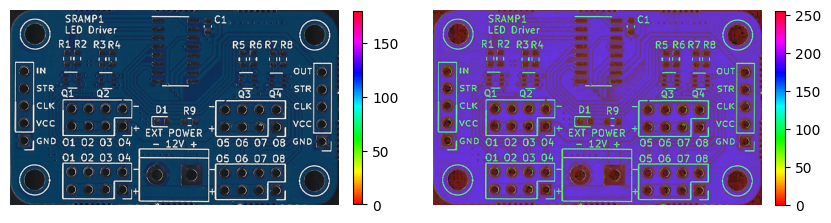

In [213]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

path = 'dcc_encoder_top_black_back.png'
# create figure and axis
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# read image as HSL (hue, saturation, lightness)
img = cv2.imread(path, cv2.IMREAD_COLOR)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
idx = 2
rgb = cv2.cvtColor(imgHSV, cv2.COLOR_HLS2RGB)
im = axs[0].imshow(rgb, cmap='hsv', vmin=0, vmax=180)
cbar = fig.colorbar(im, ax=axs[0], fraction=0.0275, pad=0.04)
axs[0].axis('off')

# apply clahe to saturation channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imgHSV[:,:,idx] = clahe.apply(imgHSV[:,:,idx])

# apply median blur to saturation channel
#imgHSV[:,:,idx] = cv2.medianBlur(imgHSV[:,:,idx], 9)
rgb = cv2.cvtColor(imgHSV, cv2.COLOR_HLS2RGB)
im = axs[1].imshow(imgHSV, cmap='hsv', vmin=0, vmax=255)
cbar = fig.colorbar(im, ax=axs[1], fraction=0.0275, pad=0.04)
axs[1].axis('off')
fig.show()








# White Mask

True

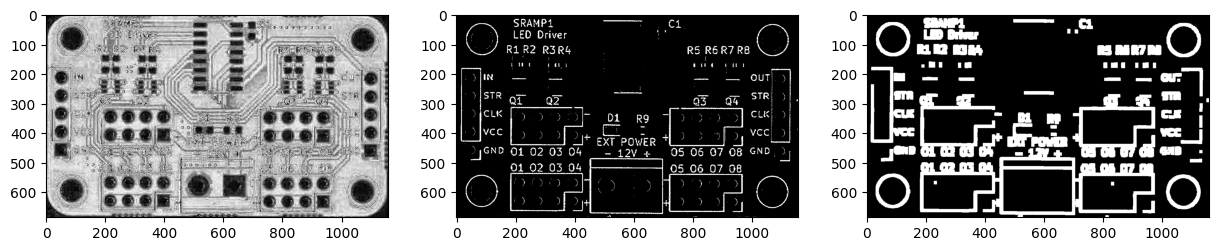

In [214]:
# thresholding
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
path = 'dcc_encoder_top_black_back.png'
img = cv2.imread(path, cv2.IMREAD_COLOR)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, imgThresh = cv2.threshold(imgGray,200,255,cv2.THRESH_BINARY)
# dilate
kernel = np.ones((3,3),np.uint8)
imgErode = cv2.erode(imgThresh, kernel, iterations=1)
whiteMask = cv2.dilate(imgErode, kernel, iterations=5)
#
axs[0].imshow(imgHSV[:,:,2], cmap='gray')
axs[1].imshow(imgThresh, cmap='gray')
axs[2].imshow(whiteMask, cmap='gray')

cv2.imwrite("white_mask.png", whiteMask)

# Inpainting

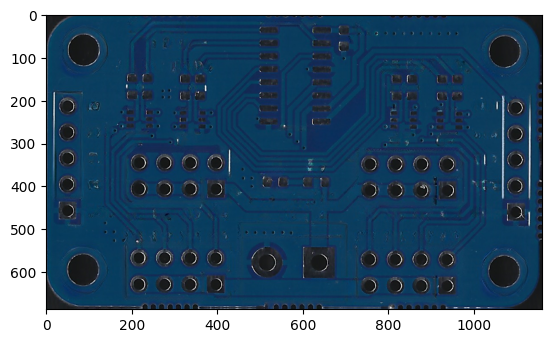

In [215]:
from simple_lama_inpainting import SimpleLama
import cv2
import numpy as np
import matplotlib.pyplot as plt

simple_lama = SimpleLama()

img_path = "dcc_encoder_top_black_back.png"
mask_path = "white_mask.png"

image = cv2.imread(img_path,cv2.IMREAD_COLOR)
mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)

inpaint = simple_lama(image, mask)
inpaint = np.array(inpaint)

cv2.imwrite("inpainted.png", inpaint)
plt.imshow(cv2.cvtColor(inpaint, cv2.COLOR_BGR2RGB))
plt.show()

# Black Mask

True

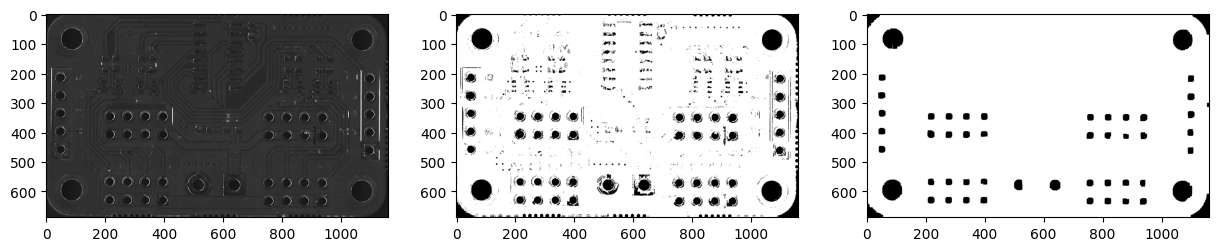

In [216]:
# thresholding
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
path = 'inpainted.png'
img = cv2.imread(path, cv2.IMREAD_COLOR)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
_, imgThresh = cv2.threshold(imgGray,36,255,cv2.THRESH_BINARY)
# dilate
kernel = np.ones((3,3),np.uint8)
imgDilate = cv2.dilate(imgThresh, kernel, iterations=6)
blackMask = cv2.erode(imgDilate, kernel, iterations=6)
axs[0].imshow(imgGray, cmap='gray')
axs[1].imshow(imgThresh, cmap='gray')
axs[2].imshow(blackMask, cmap='gray')
cv2.imwrite('black_mask.png', blackMask)

# Background Shift

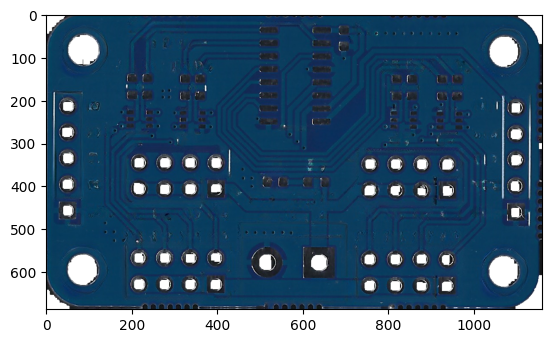

True

In [217]:
# use black mask to remove black background
img = cv2.imread("inpainted.png", cv2.IMREAD_COLOR)
black_mask = cv2.imread("black_mask.png", cv2.IMREAD_GRAYSCALE)
img[black_mask == 0] = 255


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite("inpainted_background_shift.png", img)

# Pad Seperation

C:\Users\vduec\AppData\Local\Temp\ipykernel_1764\1730034723.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


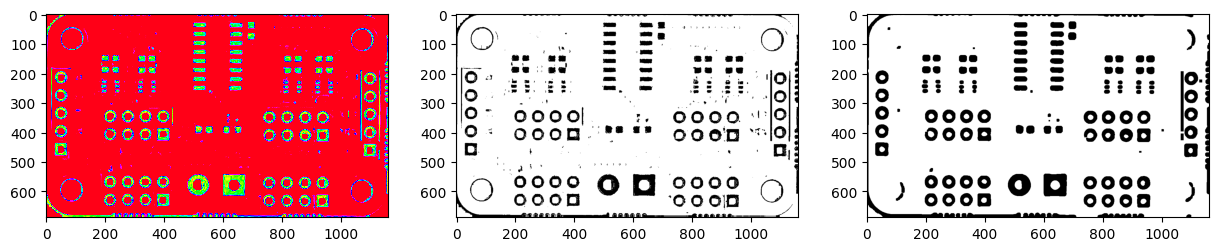

In [218]:
# read image as HSL (hue, saturation, lightness)
path = 'inpainted_background_shift.png'
img = cv2.imread(path, cv2.IMREAD_COLOR)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# utilize black mask
black_mask = cv2.imread("black_mask.png", cv2.IMREAD_GRAYSCALE)
imgHSV[:,:,1][black_mask == 0] = 255

# otsu thresholding
_, imgThresh = cv2.threshold(imgHSV[:,:,1],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imgBlur = cv2.medianBlur(imgThresh, 11)
padMask = cv2.erode(imgBlur, kernel, iterations=2)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(imgHSV[:,:,1], cmap='hsv', vmin=0, vmax=180)
axs[1].imshow(imgThresh, cmap='gray')
axs[2].imshow(padMask, cmap='gray')
cv2.imwrite('pad_mask.png', padMask)
fig.show()

# Pad Removal

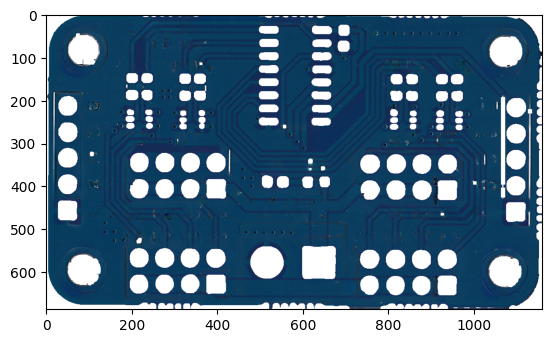

True

In [219]:
img = cv2.imread("inpainted_background_shift.png", cv2.IMREAD_COLOR)
pad_mask = cv2.imread("pad_mask.png", cv2.IMREAD_GRAYSCALE)
img[pad_mask == 0] = 255

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite("inpainted_pad_removal.png", img)

# Trace Seperation

C:\Users\vduec\AppData\Local\Temp\ipykernel_1764\1194940458.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


True

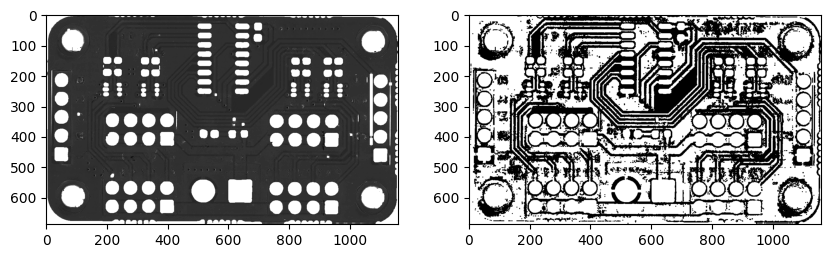

In [220]:
img = cv2.imread("inpainted_pad_removal.png", cv2.IMREAD_COLOR)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# thresholding
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, imgThresh = cv2.threshold(imgGray,47,255,cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
imgErode = cv2.erode(imgThresh, kernel, iterations=1)
# blur 

axs[0].imshow(imgGray, cmap='gray')
axs[1].imshow(imgErode, cmap='gray')
fig.show()
cv2.imwrite('trace_mask.png', imgErode)

# Trace Contours

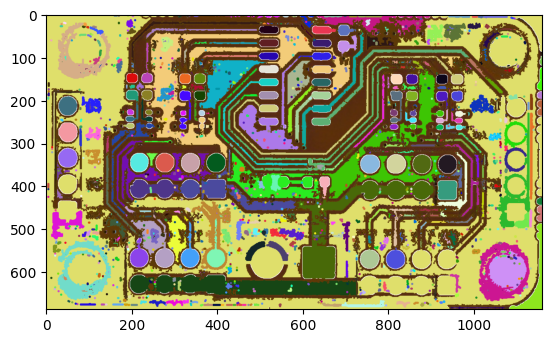

In [221]:
import random
img = cv2.imread("trace_mask.png", cv2.IMREAD_GRAYSCALE)

# find contours
contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw contours
img = cv2.imread("inpainted_pad_removal.png", cv2.IMREAD_COLOR)
for contour in contours:
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))  # Zufällige Farbe
    cv2.drawContours(img, [contour], -1, color, -1)  # Kontur füllen (-1 für Füllung)

plt.imshow(img)